In [1]:
import pandas as pd 
import numpy as np 
from pandas_profiling import ProfileReport
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/pcc/Downloads/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df=df.rename(columns={"R&D Spend":"R_D_Spend","Marketing Spend":"Marketing_Spend"})

In [6]:
df

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
model=smf.ols("Profit~R_D_Spend+Administration+Marketing_Spend+State",data=df).fit()

In [8]:
model

In [9]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
R_D_Spend                0.806023
Administration          -0.027004
Marketing_Spend          0.026980
dtype: float64

In [10]:
model.tvalues

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
R_D_Spend            17.368580
Administration       -0.517012
Marketing_Spend       1.573889
dtype: float64

In [11]:
model.pvalues

Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
R_D_Spend            2.578772e-21
Administration       6.077373e-01
Marketing_Spend      1.226769e-01
dtype: float64

In [12]:
(model.rsquared, model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.34e-27
Time:                        15:46:49   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
R_D_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend       0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Test for Normality of Residuals (Q-Q Plot)

In [14]:
residuals = model.resid
residuals

0      -128.741364
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193818
5     -6482.687120
6     -1976.782788
7     -4403.044650
8       577.026673
9     -5069.702528
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825743
19     7182.671590
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761169
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396604
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518952
42      922.496288
43     9658.711782
44      615.182788
45    17337.715291
46    -6782.242680
47    -3908.502003
48   -13449.663082
49   -33503.638791
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

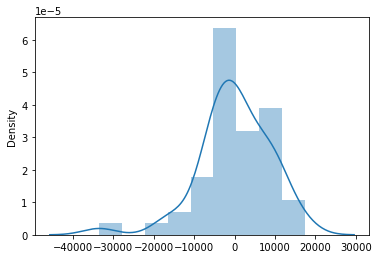

In [15]:
sns.distplot(residuals)

In [16]:
residuals.mean()

1.8017890397459268e-07

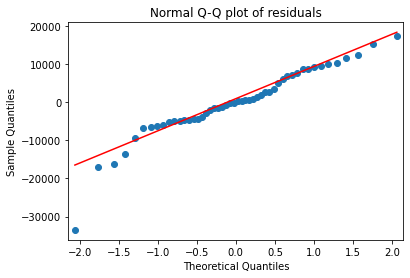

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [18]:
list(np.where(residuals<-20000))

[array([49], dtype=int64)]

In [19]:
predictions = model.fittedvalues
predictions

0     192390.571364
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133818
5     163473.807120
6     158099.292788
7     160155.644650
8     151634.743327
9     154829.662528
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301169
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236604
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311048
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232003
48     49123.073082
49     48185.038791


In [20]:
pd.DataFrame({'Actual':df.Profit,
             'Predicted': predictions,
             'Error': residuals})

,Actual,Predicted,Error
0,192261.83,192390.571364,-128.741364
1,191792.06,189071.320106,2720.739894
2,191050.39,182276.186735,8774.203265
3,182901.99,173584.976191,9317.013809
4,166187.94,172277.133818,-6089.193818
5,156991.12,163473.807120,-6482.687120
6,156122.51,158099.292788,-1976.782788
7,155752.60,160155.644650,-4403.044650
8,152211.77,151634.743327,577.026673
9,149759.96,154829.662528,-5069.702528


# Calculating VIF

In [43]:
rsq_RD = smf.ols('R_D_Spend ~ Administration + Marketing_Spend + State',data=df).fit().rsquared  
vif_RD = 1/(1-rsq_RD) # 16.33

rsq_A = smf.ols('Administration ~ R_D_Spend + Marketing_Spend + State',data=df).fit().rsquared  
vif_A = 1/(1-rsq_A) # 564.98

rsq_MS = smf.ols('Marketing_Spend ~ R_D_Spend + Administration + State',data=df).fit().rsquared  
vif_MS = 1/(1-rsq_MS) #  564.84



# Storing vif values in a data frame
d1 = {'Variables':['R_D_Spend','Administration','Marketing_Spend'],
      'VIF':[vif_RD,vif_A,vif_MS]}

Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R_D_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797


## Residual Plot for Homoscedasticity

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

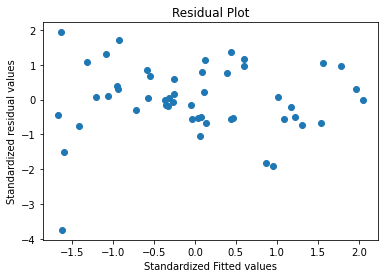

In [22]:
plt.scatter(get_standardized_values(predictions),
            get_standardized_values(residuals))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

In [23]:
import statsmodels.api as sm

eval_env: 1


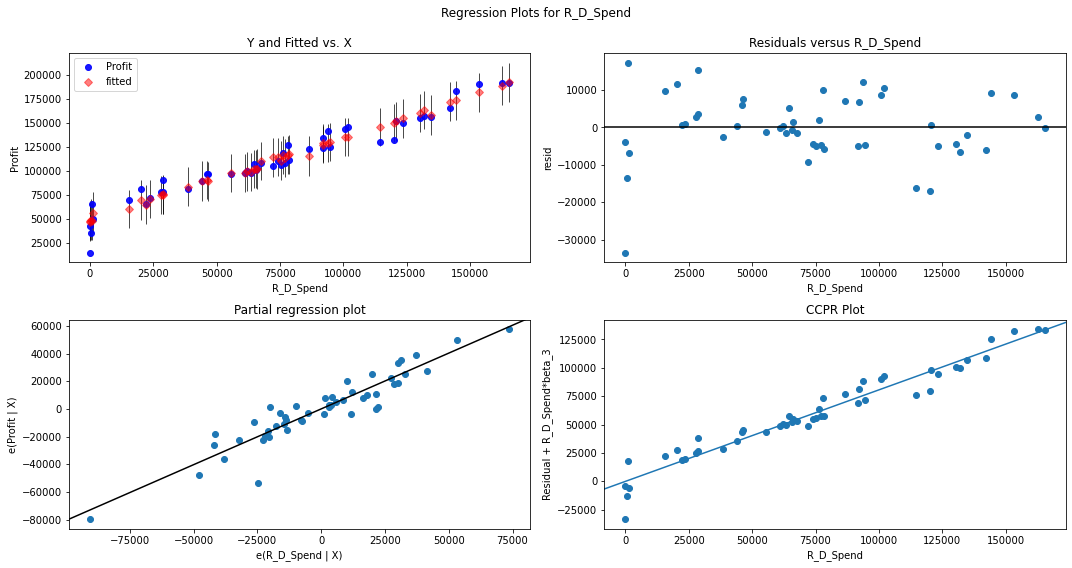

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "R_D_Spend", fig=fig)
plt.show()

eval_env: 1


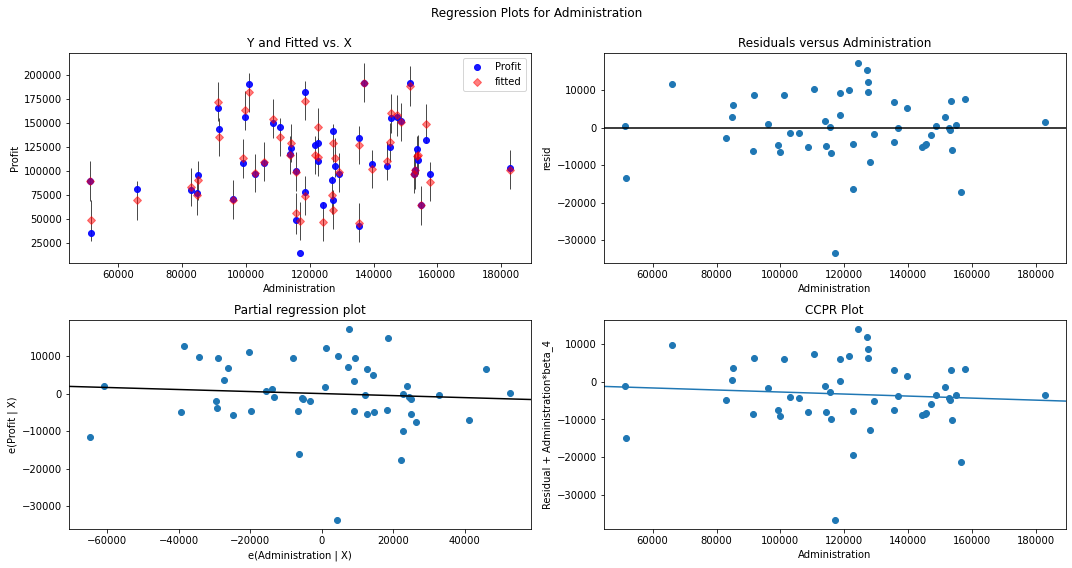

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


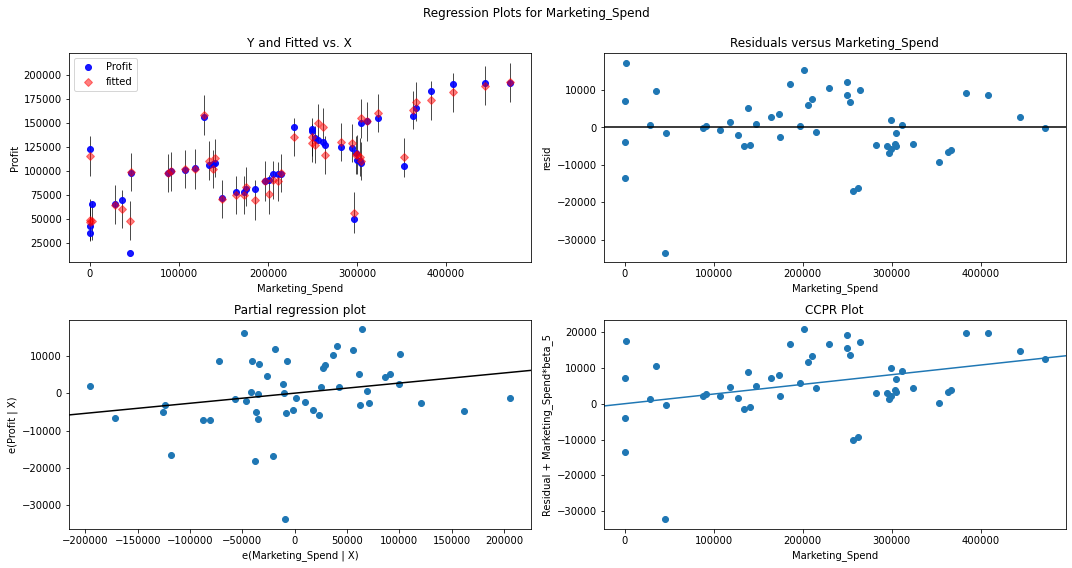

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics
## Detecting Influencers/Outliers
## Cook’s Distance

In [27]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [28]:
c

array([7.67941282e-06, 3.96002384e-03, 2.78948395e-02, 2.35705108e-02,
       1.40231490e-02, 1.17098970e-02, 2.49314176e-03, 4.16542624e-03,
       7.29467176e-05, 6.31415598e-03, 2.21391699e-02, 1.93512168e-02,
       2.13263552e-02, 7.40092001e-03, 7.20165958e-02, 4.34157410e-02,
       1.57591120e-02, 4.33058862e-03, 3.43997076e-03, 3.28909738e-02,
       7.03247647e-04, 1.17002661e-02, 3.52541534e-03, 3.68801928e-04,
       5.07030667e-03, 4.16365620e-03, 5.79414020e-03, 3.25030423e-02,
       1.07438091e-03, 1.14685871e-04, 2.67092819e-05, 4.26003185e-06,
       6.55180125e-04, 2.69550649e-04, 2.09894518e-02, 8.32171521e-03,
       5.92471519e-02, 7.19280440e-05, 5.58017593e-02, 1.60830329e-03,
       2.27122555e-03, 2.19513492e-03, 1.66164967e-04, 2.33988898e-02,
       1.16697070e-04, 9.43947846e-02, 4.23233340e-02, 4.48153392e-03,
       1.56376134e-01, 2.63959436e-01])

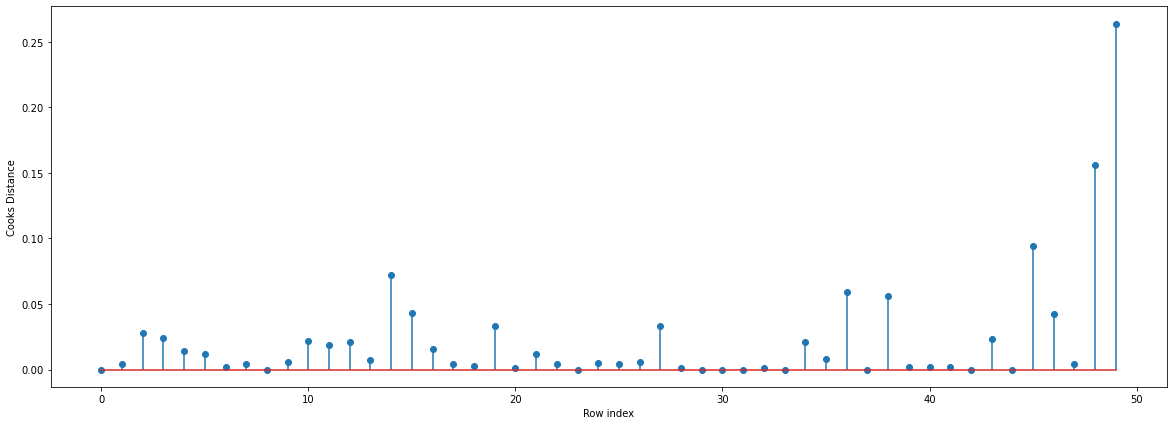

In [29]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
#index and value of influencer where c is more than .10
(np.argmax(c), np.max(c))

(49, 0.2639594358692202)

## High Influence points

<Figure size 1440x720 with 0 Axes>

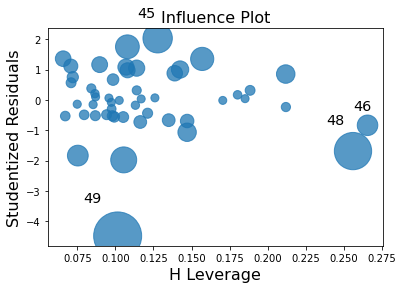

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize = (20,10))
influence_plot(model)
plt.show()

In [32]:
k = df.shape[1] #No. of features (columns)
n = df.shape[0] #No. of observations (rows)

leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

#### From the above plot, it is evident that data point 48 and 49 are the influencers

In [33]:
df.iloc[[48,49],:]

,R_D_Spend,Administration,Marketing_Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [36]:
df_new=pd.read_csv("C:/Users/pcc/Downloads/50_Startups.csv")

In [37]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1 = df_new.drop(df_new.index[[48,49]], axis=0).reset_index()

In [39]:
#Drop the original index
df1 = df1.drop(['index'], axis=1)

In [40]:
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [56]:
df1=df1.rename(columns={"R&D Spend":"R_D_Spend","Marketing Spend":"Marketing_Spend"})

In [59]:
#Exclude variable "State" and generate R-Squared and AIC values
model1= smf.ols("Profit~R_D_Spend+Administration+Marketing_Spend",data=df1).fit()

In [60]:
(model1.rsquared, model.aic, model1.bic)

(0.9626766170294073, 1062.764909597834, 1002.1538479696432)

# table containing R^2 value for each prepared model

In [66]:
t={'Prep_Models':['Model','model1'],'Rsquared':[model.rsquared,model1.rsquared]}
table=pd.DataFrame(t)
table

,Prep_Models,Rsquared
0,Model,0.950752
1,model1,0.962677
